In [1]:
# Tested using python 3.10.6
# Dependencies 
# !pip3 install torch torchvision torchaudio
# !pip3 install nuscenes-devkit
# https://www.nuscenes.org/data/v1.0-mini.tgz

In [2]:
import os
from PIL import Image
from IPython.display import Image as IPImage
from torchvision import transforms
import openai_secrets

In [3]:
from nuscenes.can_bus.can_bus_api import NuScenesCanBus
from nuscenes.nuscenes import NuScenes
PATH = '/Users/jonathanmorris/Downloads/v1.0-mini' # Path to dataset

nusc = NuScenes(version='v1.0-mini', dataroot=PATH, verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.499 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [4]:
my_scene = nusc.scene[3]
my_scene

{'token': 'bebf5f5b2a674631ab5c88fd1aa9e87a',
 'log_token': '6f7fe59adf984e55a82571ab4f17e4e2',
 'nbr_samples': 41,
 'first_sample_token': '5991fad3280c4f84b331536c32001a04',
 'last_sample_token': '35833ae5808e4ef186d1fdebac3d9cf6',
 'name': 'scene-0655',
 'description': 'Parking lot, parked cars, jaywalker, bendy bus, gardening vehicles'}

In [5]:
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': '5991fad3280c4f84b331536c32001a04',
 'timestamp': 1535385092150099,
 'prev': '',
 'next': '2578329fc3ae484bb23ef766808f4be5',
 'scene_token': 'bebf5f5b2a674631ab5c88fd1aa9e87a',
 'data': {'RADAR_FRONT': '9c0e927f845e412c93cb2846bb72f27f',
  'RADAR_FRONT_LEFT': 'fbb8f507b73c435ab16bab9f509f2218',
  'RADAR_FRONT_RIGHT': '2484789d50b645bbabacc8e735d8af13',
  'RADAR_BACK_LEFT': '0fc32f1d2160443f9eedaa8edcfd05bf',
  'RADAR_BACK_RIGHT': 'da0903784e9646c39125737bea931db6',
  'LIDAR_TOP': '603a96c23db34acf8b5953d958df293d',
  'CAM_FRONT': 'be95ce80ec624f81ba6737eb67241215',
  'CAM_FRONT_RIGHT': 'de7f64fb4882443e99b21e51997756d7',
  'CAM_BACK_RIGHT': '0cdb6b298b814b38bf9d7544f7f502a5',
  'CAM_BACK_LEFT': '0d0a7c385ac84d64a4e8bd0545aff787',
  'CAM_BACK': 'f256db4ccc1d41d9920e168184d2411f',
  'CAM_FRONT_LEFT': '514d62f8cd534483a9d9509b26e87041'},
 'anns': ['8b979f63281c4955afe07d57a21aa0e1',
  'be3536192b93448394597729df1cf52f',
  'b6ded29415ae4ad2b76f0bf73fb674ce',
  '15bc2adc7b6b48bf8

In [6]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
current_image_path = PATH+"/"+cam_front_data['filename']
current_image_path

'/Users/jonathanmorris/Downloads/v1.0-mini/samples/CAM_FRONT/n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385092112404.jpg'

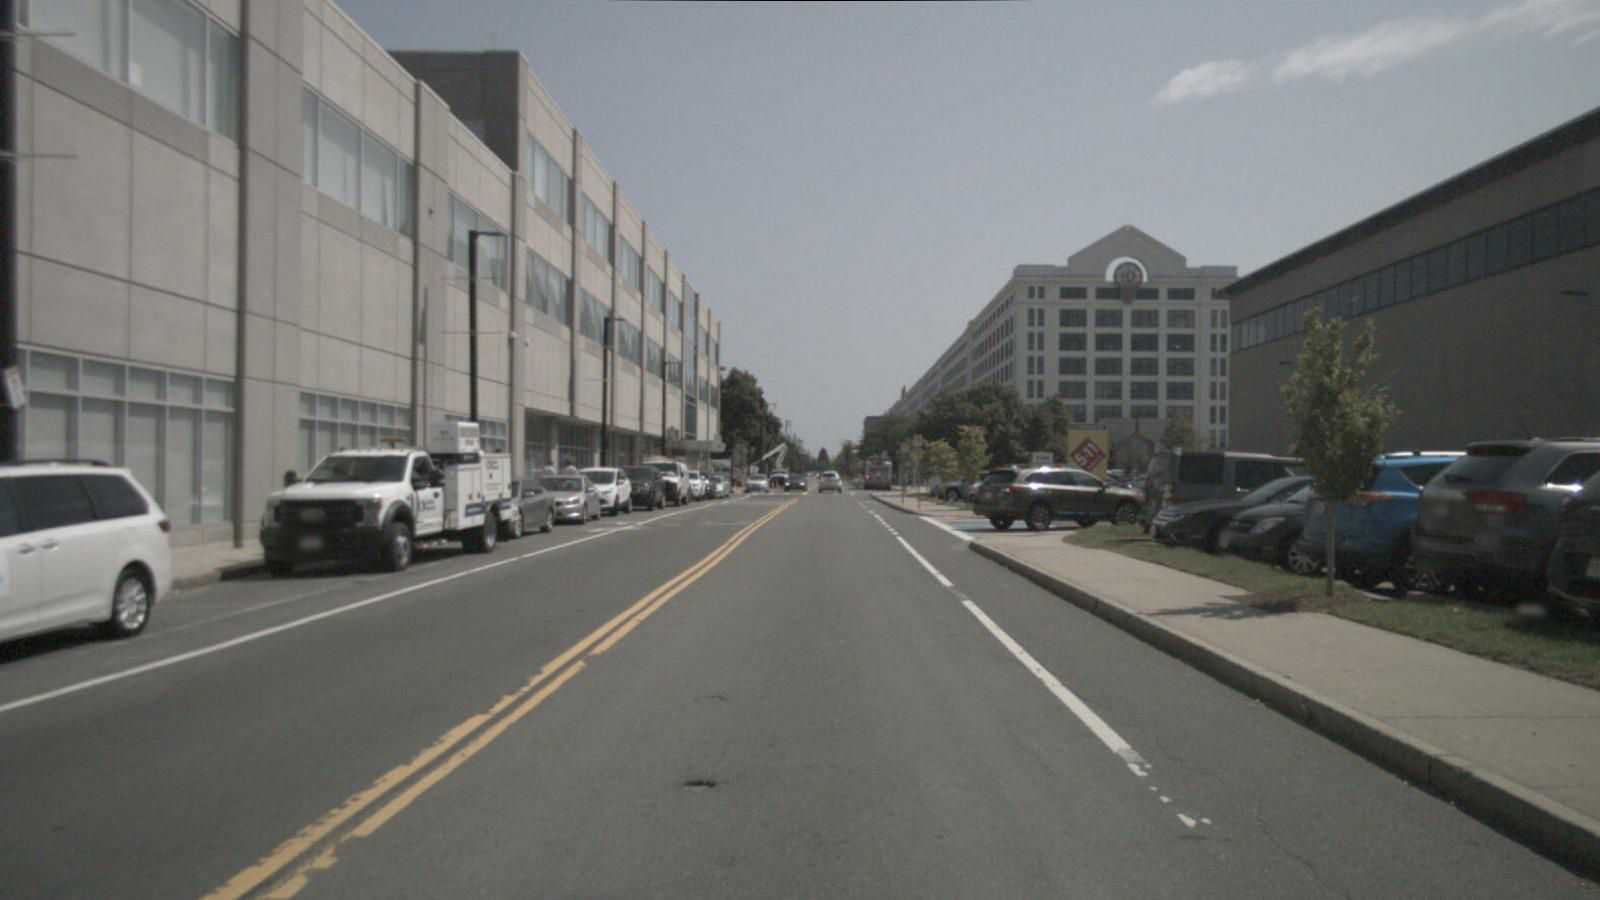

In [7]:
img = Image.open(current_image_path)
img

In [9]:
import base64
import requests

# OpenAI API Key
api_key = openai_secrets.api_key

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = current_image_path

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "Write me prolog code to associate driving behavior to car's environment."
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())


{'id': 'chatcmpl-9LIsKGyNq6AyaSQcv8xVs6SebNDvi', 'object': 'chat.completion', 'created': 1714864472, 'model': 'gpt-4-1106-vision-preview', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "Certainly! Here's a Prolog code snippet that demonstrates how you might associate a car's driving behavior with its environment. In this Prolog code, we're going to create facts and rules that help a program determine the proper driving behavior based on visual cues from the environment such as traffic signals, pedestrians, road conditions, etc.\n\n```prolog\n% Define facts about various environmental conditions\nroad_condition(wet).\nroad_condition(dry).\ntraffic_density(high).\ntraffic_density(low).\ntraffic_signal(green).\ntraffic_signal(yellow).\ntraffic_signal(red).\npedestrian(crossing).\npedestrian(not_crossing).\n\n% Define the driving behavior rules\ndriving_behavior(Speed, Action) :-\n    road_condition(dry),\n    traffic_density(low),\n    traffic_signal(green),\n    pe

In [15]:
response.json()['choices'][0]['message']['content']

"Certainly! Here's a Prolog code snippet that demonstrates how you might associate a car's driving behavior with its environment. In this Prolog code, we're going to create facts and rules that help a program determine the proper driving behavior based on visual cues from the environment such as traffic signals, pedestrians, road conditions, etc.\n\n```prolog\n% Define facts about various environmental conditions\nroad_condition(wet).\nroad_condition(dry).\ntraffic_density(high).\ntraffic_density(low).\ntraffic_signal(green).\ntraffic_signal(yellow).\ntraffic_signal(red).\npedestrian(crossing).\npedestrian(not_crossing).\n\n% Define the driving behavior rules\ndriving_behavior(Speed, Action) :-\n    road_condition(dry),\n    traffic_density(low),\n    traffic_signal(green),\n    pedestrian(not_crossing),\n    Speed = normal_speed,\n    Action = proceed.\n\ndriving_behavior(Speed, Action) :-\n    traffic_density(high),\n    Speed = reduced_speed,\n    Action = cautious_driving.\n\ndrivi